<a href="https://colab.research.google.com/github/Zakibrahmi/imputingValues/blob/main/binning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Binning** is a data preprocessing technique where continuous variables are divided into discrete intervals, called bins. It simplifies data by grouping it into categories, which can help in reducing noise, handling outliers, and making data easier to interpret or model.

For instance, ages can vary anywhere from 0 to 200, while income levels can span a broad spectrum, ranging from very low to extremely high.

Moreover, working with continuous data can be challenging, particularly when identifying patterns or making predictions. This can be simplified by binning, which groups the data into a smaller number of meaningful categories.

Let explain by example: The height of a person is a continuous variable because it can take any value within a range, such as 150.5 cm, 172.3 cm, or 180.8 cm.

If we wanted to simplify this data for analysis, we could use binning:

* 150–160 cm: Short
* 161–170 cm: Medium
* 171–180 cm: Tall
* 181 cm and above: Very Tall

This categorization makes it easier to identify patterns or trends, like determining which height group is most common in a population.

**Let practice Some binning methods:**

**1. Entropy MDL Binning** is a binning technique used for discretizing continuous variables based on the Minimum Description Length (MDL) principle, combined with entropy as a criterion for choosing the optimal bin edges. This method is often used in data preprocessing, especially when trying to handle continuous features and convert them into categorical ones for use in machine learning models.

In the following code, we use *KBinsDiscretizer* from sklearn

In [2]:
import numpy as np
from sklearn.preprocessing import KBinsDiscretizer

# Sample dataset of customer ages
customer_ages = np.array([18, 25, 28, 35, 38, 42, 55, 60, 70, 80])

# Specify the number of desired bins
n_bins = 4

# Create the KBinsDiscretizer with the entropy criterion
binning_model = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='uniform')

# Fit the model and transform the data
binned_ages = binning_model.fit_transform(customer_ages.reshape(-1, 1)).astype(int)

# Decode bin labels to represent the bin ranges
bin_edges = binning_model.bin_edges_[0]
bin_labels = [f"{int(bin_edges[i])}-{int(bin_edges[i+1])}" for i in range(len(bin_edges) - 1)]

# Print the binned ages
for age, bin_idx in zip(customer_ages, binned_ages):
    bin_label = bin_labels[bin_idx[0]]
    print(f"Age {age} belongs to bin: {bin_label}")


Age 18 belongs to bin: 18-33
Age 25 belongs to bin: 18-33
Age 28 belongs to bin: 18-33
Age 35 belongs to bin: 33-49
Age 38 belongs to bin: 33-49
Age 42 belongs to bin: 33-49
Age 55 belongs to bin: 49-64
Age 60 belongs to bin: 49-64
Age 70 belongs to bin: 64-80
Age 80 belongs to bin: 64-80


**2. Quantiles Binning** Divides the data into bins based on specific percentiles or quantiles. For example, with a dataset of exam scores, quartile binning would split the data into bins like the 0–25th percentile, 25th–50th percentile, 50th–75th percentile, and 75th–100th percentile.

Score 75 belongs to bin: 69.75-80.0th percentile
Score 82 belongs to bin: 80.0-88.75th percentile
Score 90 belongs to bin: 88.75-100th percentile
Score 60 belongs to bin: 0-69.75th percentile
Score 68 belongs to bin: 0-69.75th percentile
Score 78 belongs to bin: 69.75-80.0th percentile
Score 85 belongs to bin: 80.0-88.75th percentile
Score 92 belongs to bin: 88.75-100th percentile
Score 95 belongs to bin: 88.75-100th percentile
Score 55 belongs to bin: 0-69.75th percentile


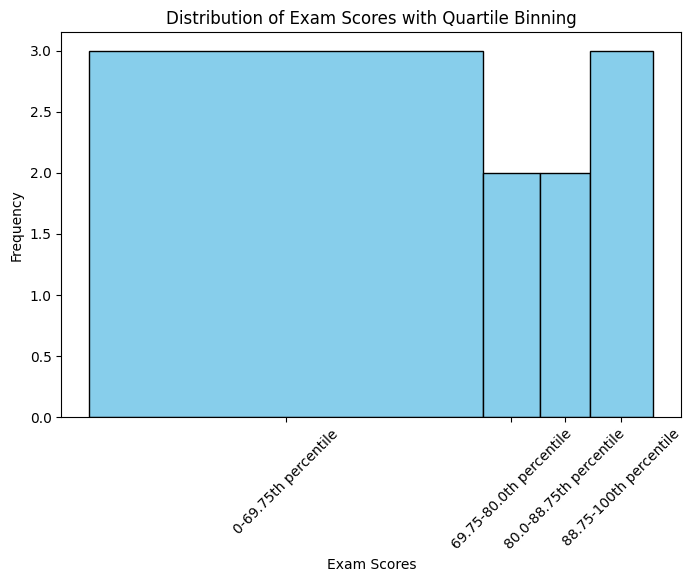

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Sample dataset of exam scores
exam_scores = np.array([75, 82, 90, 60, 68, 78, 85, 92, 95, 55])

# Calculate quartiles
q1 = np.percentile(exam_scores, 25)
q2 = np.percentile(exam_scores, 50)
q3 = np.percentile(exam_scores, 75)

# Create bin labels based on quartiles
bin_labels = [f"0-{q1}th percentile", f"{q1}-{q2}th percentile", f"{q2}-{q3}th percentile", f"{q3}-100th percentile"]

# Use pandas to bin the data
bins = pd.cut(exam_scores, [0, q1, q2, q3, 100], labels=bin_labels, include_lowest=True)

# Print the binned exam scores
for score, bin_label in zip(exam_scores, bins):
    print(f"Score {score} belongs to bin: {bin_label}")

# Plotting the binned data
plt.figure(figsize=(8, 5))
plt.hist(exam_scores, bins=[0, q1, q2, q3, 100], edgecolor='black', color='skyblue')

# Set labels and title
plt.xlabel('Exam Scores')
plt.ylabel('Frequency')
plt.title('Distribution of Exam Scores with Quartile Binning')

# Add bin labels on the x-axis
bin_edges = [0, q1, q2, q3, 100]
bin_centers = [(bin_edges[i] + bin_edges[i+1]) / 2 for i in range(len(bin_edges)-1)]

# Set the x-ticks to the bin centers and use the bin labels
plt.xticks(bin_centers, bin_labels, rotation=45)

plt.show()


**Manually Handling**
In a product price dataset, you can define custom bins, such as categorizing prices under 10 as "Low" prices between 10 and 50 as "Medium," and prices over 50 as "High."

Example:
For a list of product prices like [5, 15, 25, 60, 45, 80], you could create the following bins:

*  "Low" for prices less than 10 (e.g., 5).
*  "Medium" for prices between 10 and 50 (e.g., 15, 25, 45)
*  "High" for prices greater than 50 (e.g., 60, 80)

This method helps categorize and simplify data, making it easier to analyze and interpret.

Price $5 belongs to bin: Low
Price $15 belongs to bin: Medium
Price $25 belongs to bin: Medium
Price $60 belongs to bin: High
Price $45 belongs to bin: Medium
Price $80 belongs to bin: High


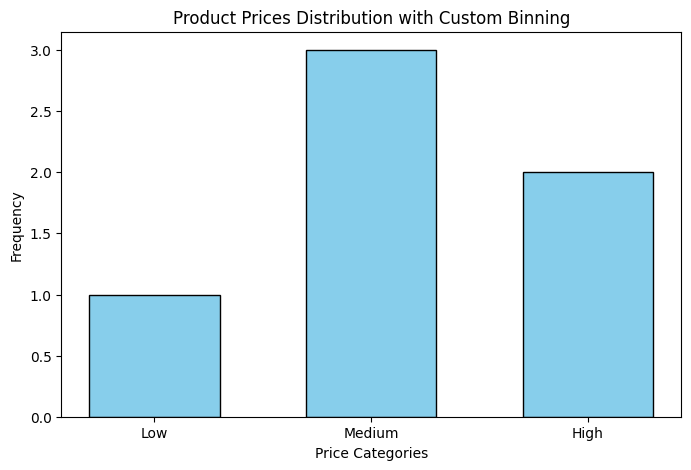

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Sample dataset of product prices
product_prices = np.array([5, 15, 25, 60, 45, 80])

# Define custom bin boundaries
bin_labels = ["Low", "Medium", "High"]
bin_boundaries = [0, 10, 50, np.inf]  # 0-10 as Low, 10-50 as Medium, >50 as High

# Use pandas to bin the data based on the custom boundaries
binned_prices = pd.cut(product_prices, bins=bin_boundaries, labels=bin_labels, right=False)

# Print the binned product prices
for price, bin_label in zip(product_prices, binned_prices):
    print(f"Price ${price} belongs to bin: {bin_label}")

# Create the frequency counts for each bin
bin_counts = [np.sum((product_prices >= bin_boundaries[i]) & (product_prices < bin_boundaries[i+1])) for i in range(len(bin_boundaries)-1)]

# Plotting the binned data with custom bar positions
plt.figure(figsize=(8, 5))
bar_width = 0.6

# Bar positions (centers of bins)
bar_positions = np.arange(len(bin_labels))

# Plot bars
plt.bar(bar_positions, bin_counts, width=bar_width, color='skyblue', edgecolor='black')

# Set labels and title
plt.xlabel('Price Categories')
plt.ylabel('Frequency')
plt.title('Product Prices Distribution with Custom Binning')

# Set x-ticks with bin labels
plt.xticks(bar_positions, bin_labels)

# Show the plot
plt.show()
